# Create a neural network and use it to classify the  mist + fashion mnist dataset. If using pytorch, you may change loading of mnist and fashion mnist. Total of [50 + 1 marks].

In [1]:
# Load the dataset.

import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist
fmnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fmnist

x_train = np.concatenate([x_train_mnist, x_train_fmnist], axis=0)
y_train = np.concatenate([y_train_mnist, y_train_fmnist + 10])
x_test = np.concatenate([x_test_mnist, x_test_fmnist], axis=0)
y_test = np.concatenate([y_test_mnist, y_test_fmnist + 10])

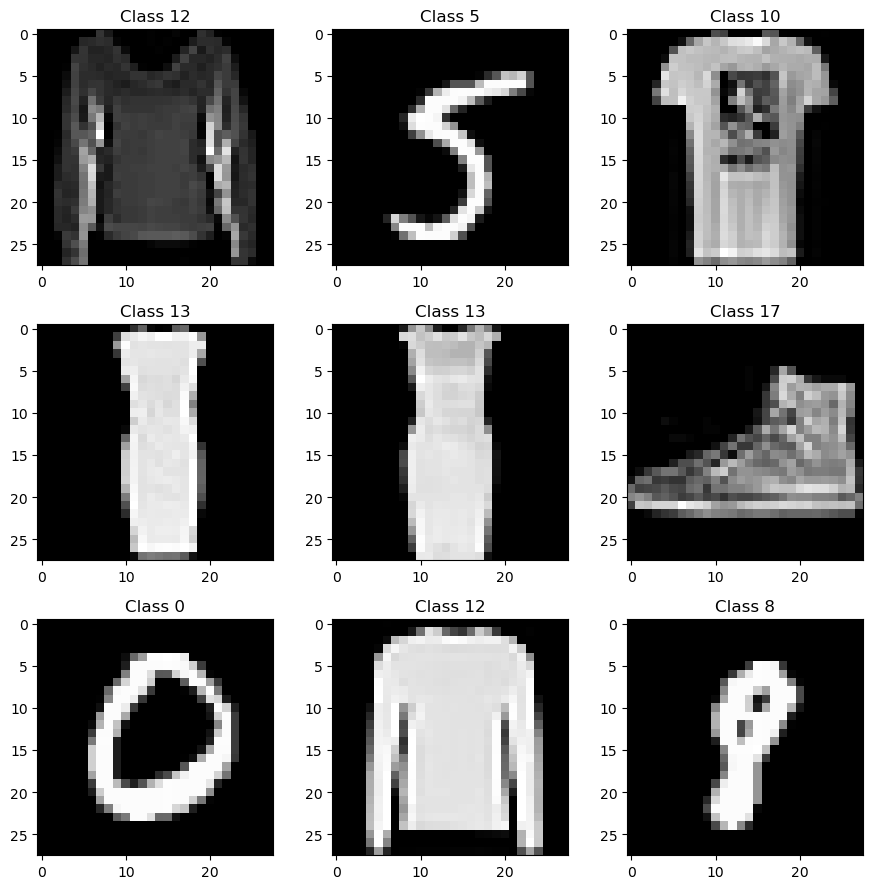

In [2]:
# Inspect images
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [3]:
x_train.shape

x_train= x_train/255.0
x_test = x_test/255.0

In [40]:
# Construct a convolutional neural network. 
# Network should have at least one convolutional layer.

from tensorflow.keras.models import Sequential 

model = Sequential()
# Complete the code.
# [20 marks]
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model.add(Conv2D(64, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Train the network and save its weights in a *.hdf5 file.
# Display the training accuracy and loss at each epoch.
# [20 marks]

model.fit(x_train, y_train, epochs=8)

model.save('model_weights.hdf5')

Epoch 1/8
3750/3750 [==============================] - 111s 29ms/step - loss: 0.2821 - accuracy: 0.9013
Epoch 2/8
3750/3750 [==============================] - 130s 35ms/step - loss: 0.1691 - accuracy: 0.9384
Epoch 3/8
3750/3750 [==============================] - 112s 30ms/step - loss: 0.1395 - accuracy: 0.9486
Epoch 4/8
3750/3750 [==============================] - 133s 35ms/step - loss: 0.1192 - accuracy: 0.9557
Epoch 5/8
3750/3750 [==============================] - 108s 29ms/step - loss: 0.1023 - accuracy: 0.9614
Epoch 6/8
3750/3750 [==============================] - 107s 28ms/step - loss: 0.0893 - accuracy: 0.9664
Epoch 7/8
3750/3750 [==============================] - 104s 28ms/step - loss: 0.0779 - accuracy: 0.9710
Epoch 8/8
3750/3750 [==============================] - 105s 28ms/step - loss: 0.0685 - accuracy: 0.9739


In [42]:
# Test the network. 
# Load model from the saved .hdf5 file.
# Evaluate the model's accuracy.
# Full marks when test accuracy is greater than 90%;
# 90% of marks when test accuracy is greater than 80% but less than 90%; 
# 80% of marks when test accuracy is greater than 70% but less than 80%.
# 1 bonus mark when test accuracy is greater than 95%.
# [10 + 1 marks]


model_load = tf.keras.models.load_model('model_weights.hdf5')

_, accuracy = model_load.evaluate(x_test, y_test)

print('Test accuracy: %.2f' % (accuracy*100))

625/625 [==============================] - 6s 10ms/step - loss: 0.1930 - accuracy: 0.9474
Test accuracy: 94.74
